In [14]:
import numpy as np
from PIL import Image
import cv2
import numpy as np
path = 'moon_noisy.png'
img = Image.open(path)
imarray = np.asarray(img)
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-20, 21)  
y = np.arange(-20, 21)  
X, Y = np.meshgrid(x, y)
def gaussian_filter(sigma_g):
    
    Gf = np.exp(-(X**2 + Y**2) / (2 * sigma_g**2))
    Gf /= np.sum(Gf)
    
    return Gf

        
def convolve_with_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def ima(im):
    

    b,g,r = cv2.split(im)
    blurred_image_r = convolve_with_kernel(r, kernel)
    blurred_image_g = convolve_with_kernel(g, kernel)
    blurred_image_b = convolve_with_kernel(b, kernel)
    imagee = cv2.merge([blurred_image_b, blurred_image_g, blurred_image_r])
    return plt.imshow(imagee);
    


#print("Red channel:")
#print(r)

#print("Green channel:")
#print(g)

#print("Blue channel:")
#print(b)

#plt.imshow(kernal, cmap = 'gray')

#imagee.shape
#print(kernal)

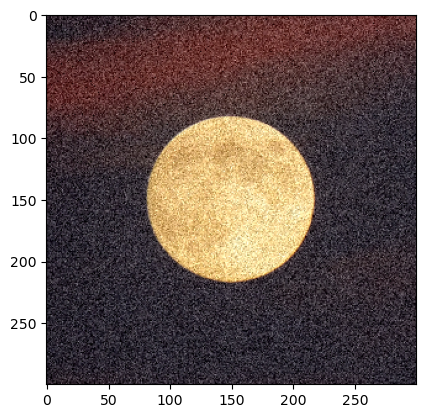

In [15]:
# sigma_g = 0

sigma_0 = plt.imshow(imarray)

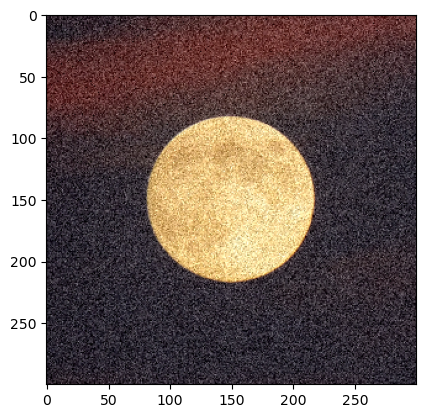

In [16]:
#sigma = 0.1
kernel = gaussian_filter(0.1)
sigma_1 = ima(imarray)

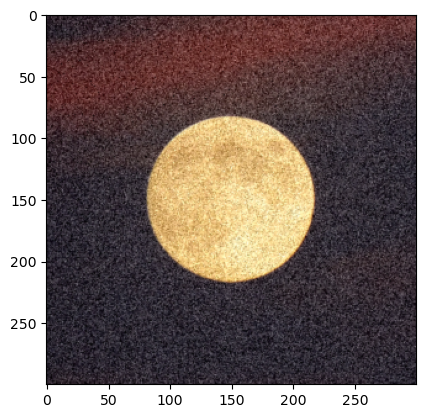

In [17]:
# sigma = 0.5
kernel = gaussian_filter(0.5)
sigma_2 = ima(imarray)

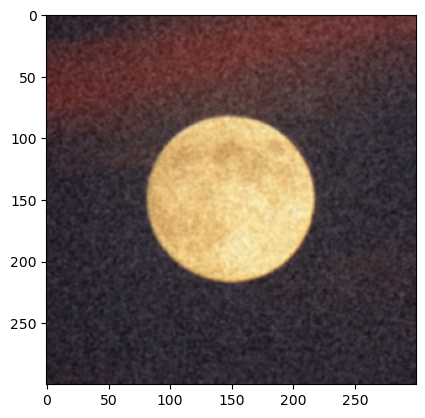

In [18]:
# sigma = 1
kernel = gaussian_filter(1)
sigma_3 = ima(imarray)

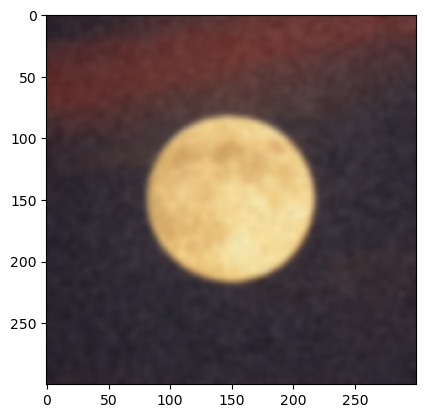

In [19]:
# sigma = 2.5
kernel = gaussian_filter(2.5)
sigma_4 = ima(imarray)

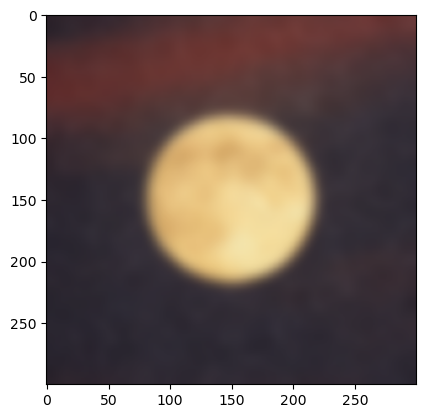

In [20]:
# sigma = 5
kernel = gaussian_filter(5)
sigma_5 = ima(imarray)

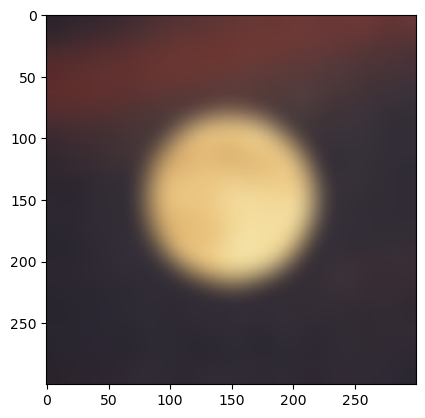

In [21]:
# sigma = 10
kernel = gaussian_filter(10)
sigma_6 = ima(imarray)

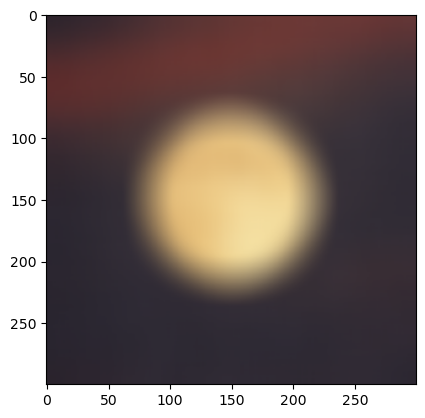

In [22]:
# sigma = 20
kernel = gaussian_filter(20)
sigma_7 = ima(imarray)



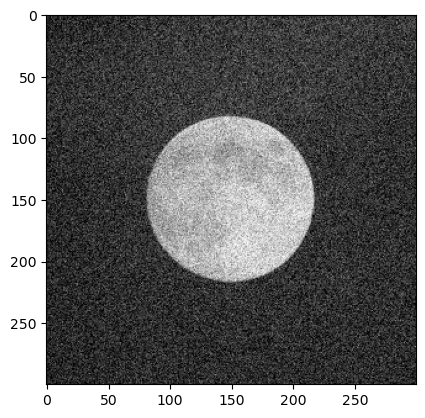

In [23]:
#from skimage import color
#gray_image = color.rgb2gray(imagee)
gray_image_0 = cv2.cvtColor(imarray, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_0, cmap="gray")
plt.show()

In [25]:
import numpy as np
from PIL import Image
import cv2
import numpy as np
path = 'moon_noisy.png'
img = Image.open(path)
imarray = np.asarray(img)
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-20, 21)  
y = np.arange(-20, 21)  
X, Y = np.meshgrid(x, y)
def gaussian_filter(sigma_g):
    
    Gf = np.exp(-(X**2 + Y**2) / (2 * sigma_g**2))
    Gf /= np.sum(Gf)
    
    return Gf

        
def convolve_with_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def ima(im):
    

    b,g,r = cv2.split(im)
    blurred_image_r = convolve_with_kernel(r, kernel)
    blurred_image_g = convolve_with_kernel(g, kernel)
    blurred_image_b = convolve_with_kernel(b, kernel)
    imagee = cv2.merge([blurred_image_b, blurred_image_g, blurred_image_r])
    return imagee
    
    

def gray(i):
    gray_image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap="gray")
    return plt.show()
def grayim(i):
    gray_image = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    return gray_image


In [31]:
def histogram(grayscaleimage):
    frequency = np.array(256*[0])

    for i in range(grayscaleimage.size):
        frequency[[grayscaleimage[i]]] +=1 
    return frequency



def otsu(block,thr):
    thr = within_class_variance(block.flatten(), 255)
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block



def within_class_variance(grayscaleimage,threshold):
    
    freq = histogram(grayscaleimage)
    
    
    
    p = freq/len(grayscaleimage)
    best_thr = 0
    min_within = 99999999999
    for j in range(threshold):
        #class 0 prob
        c0p =np.sum(p[:j+1])
        c1p = np.sum(p[j+1:])
        if c0p !=0 and c1p !=0:
            #class 0 mean
            c0m = np.sum(np.arange(0,j+1)*p[:j+1])/c0p
            c1m = np.sum(np.arange(j+1,256)*p[j+1:])/c1p
            #variance class 0 
            c0v = np.sum(((np.arange(0,j+1) - c0m)**2 * p[:j+1])/c0p)
            c1v = np.sum(((np.arange(j+1,256) - c1m)**2 * p[j+1:])/c1p)
            # within class variance
            within_class_variance = c0p*c0v + c1p*c1v
            
            initial_within_variance[j] = within_class_variance
        
            if within_class_variance < min_within:
            
                min_within = within_class_variance
                best_thr = j

    return best_thr, min_within

initial_within_variance = np.ones(256)






## his, grayscaleimg , binarized img 

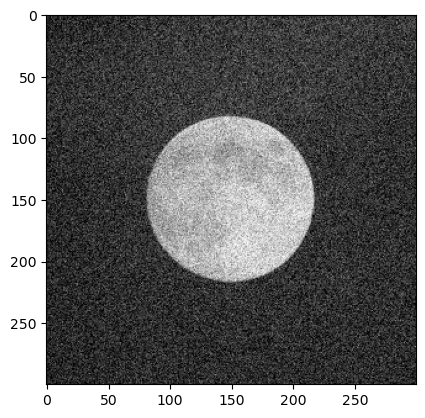

None
117 670.8329451085989


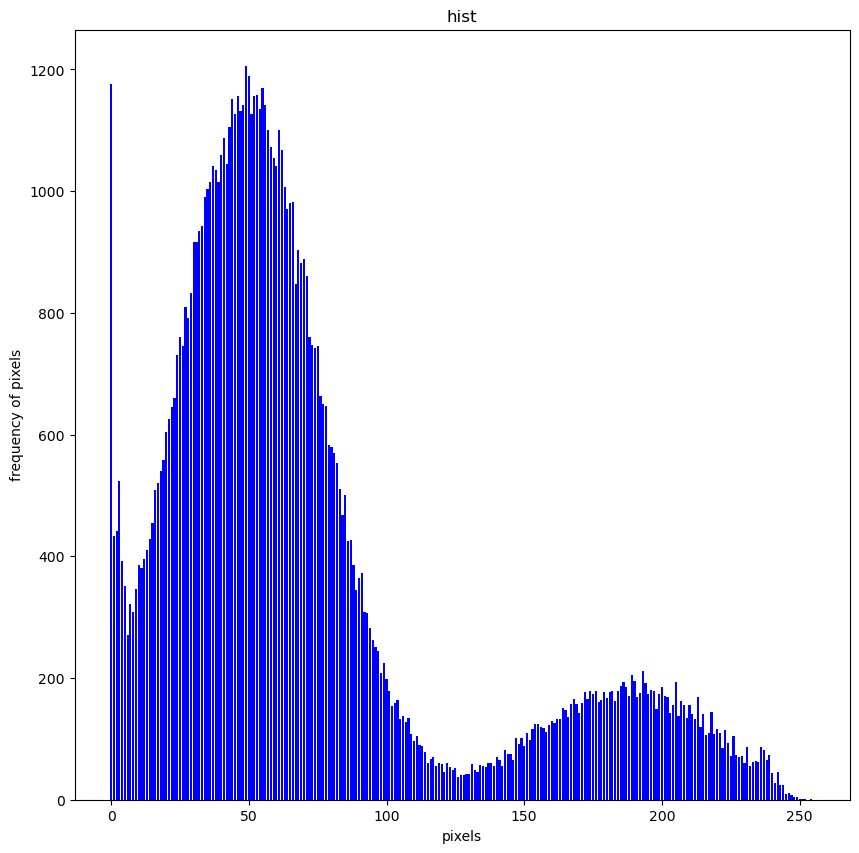

In [39]:
#sigma = 0.1

kernel = gaussian_filter(0.1)
print(gray(ima(imarray)))
gray_2 = grayim(ima(imarray))
flat_gray_2 = gray_2.flatten()
a,b = within_class_variance(flat_gray_2,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_2) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block
#plt.imshow(otsu(gray_2,117), cmap = 'gray')


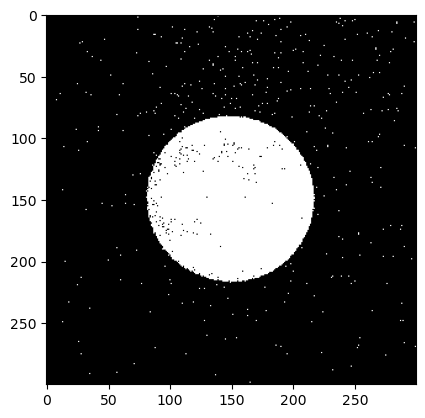

In [40]:
plt.imshow(otsu(gray_2,117), cmap = 'gray')

### sigma = 0.5

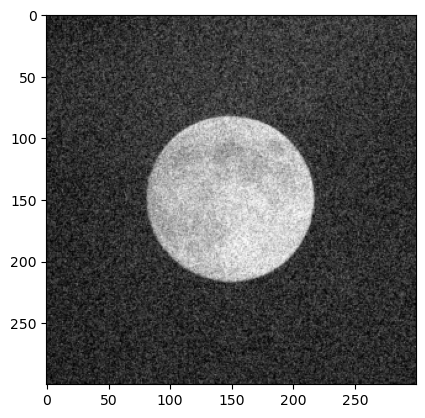

None
117 333.3382853965876


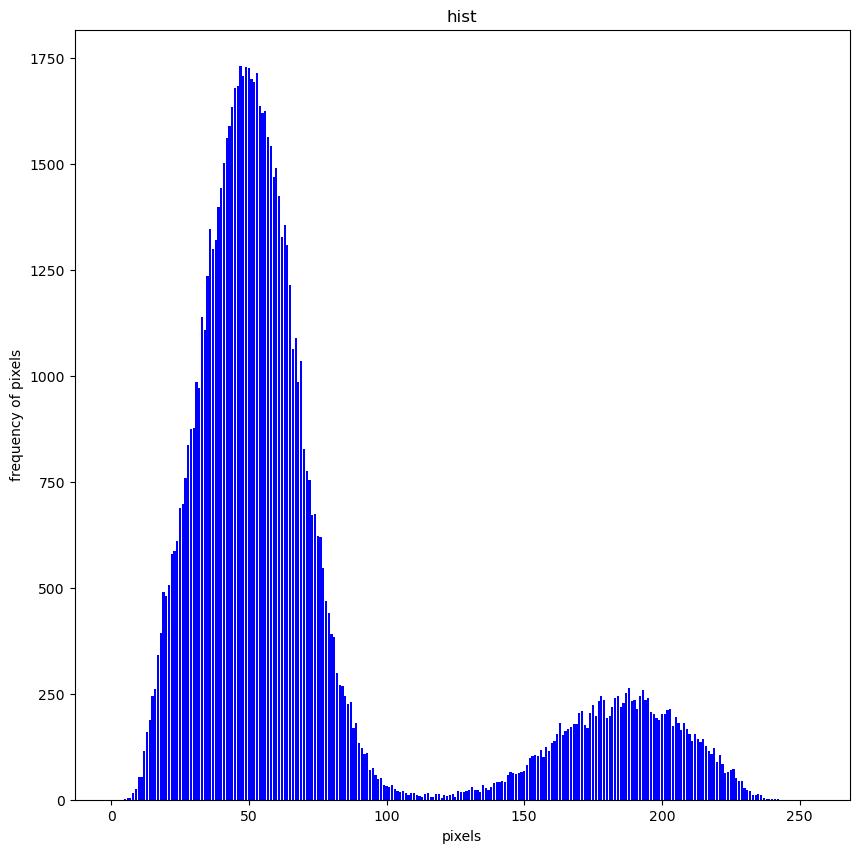

In [42]:
kernel = gaussian_filter(0.5)
print(gray(ima(imarray)))
gray_3 = grayim(ima(imarray))
flat_gray_3 = gray_3.flatten()
a,b = within_class_variance(flat_gray_3,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_3) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block
#plt.imshow(otsu(gray_2,117), cmap = 'gray')


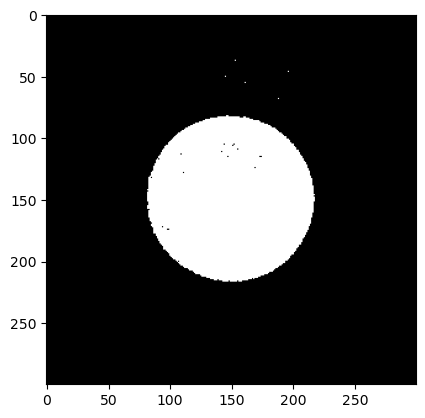

In [43]:
plt.imshow(otsu(gray_3,117), cmap = 'gray')

## simga = 1

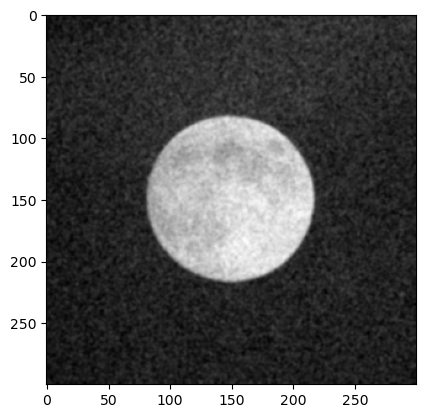

None
117 141.36212216598216


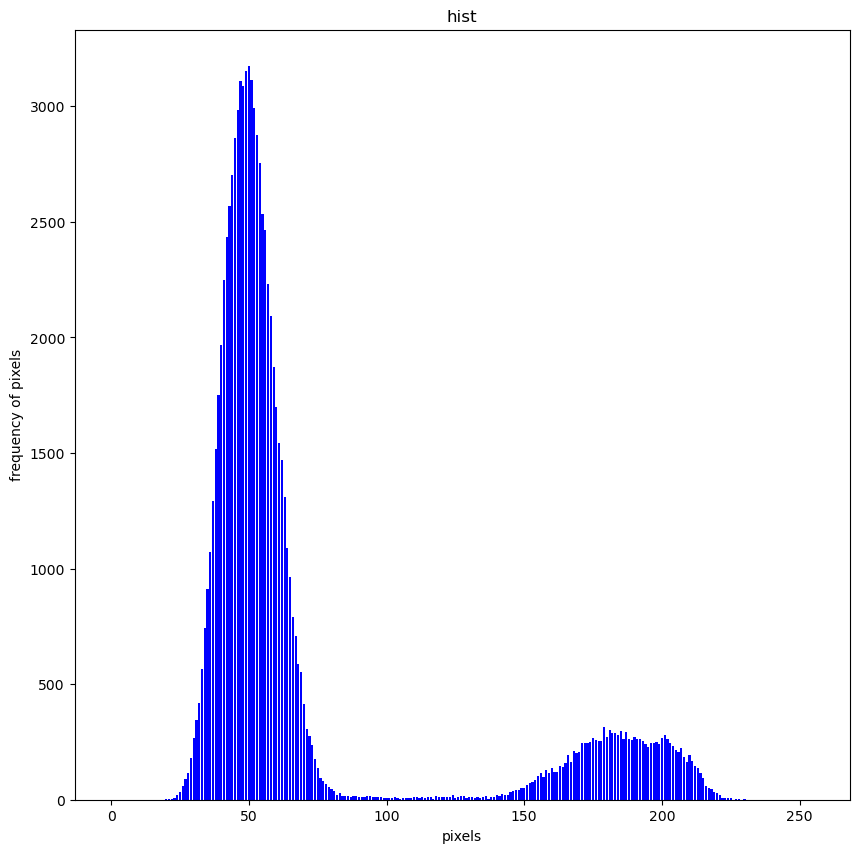

In [44]:
kernel = gaussian_filter(1)
print(gray(ima(imarray)))
gray_4 = grayim(ima(imarray))
flat_gray_4 = gray_4.flatten()
a,b = within_class_variance(flat_gray_4,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_4) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block
#plt.imshow(otsu(gray_2,117), cmap = 'gray')


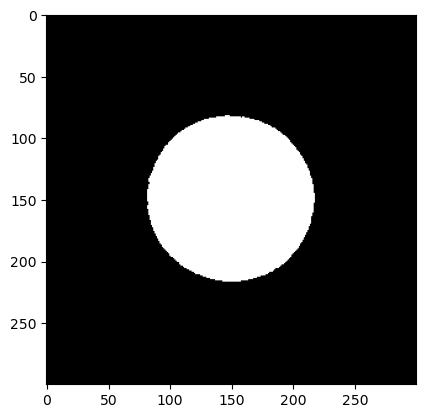

In [45]:
plt.imshow(otsu(gray_4,117), cmap = 'gray')

### sigma = 2.5

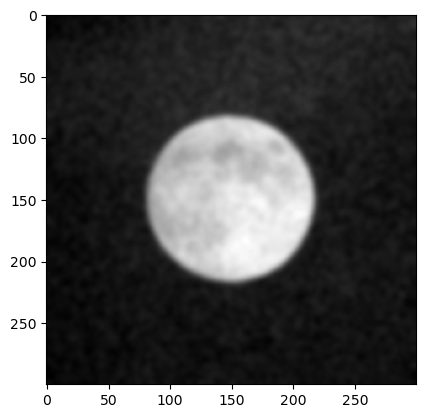

None
116 122.99550838650401


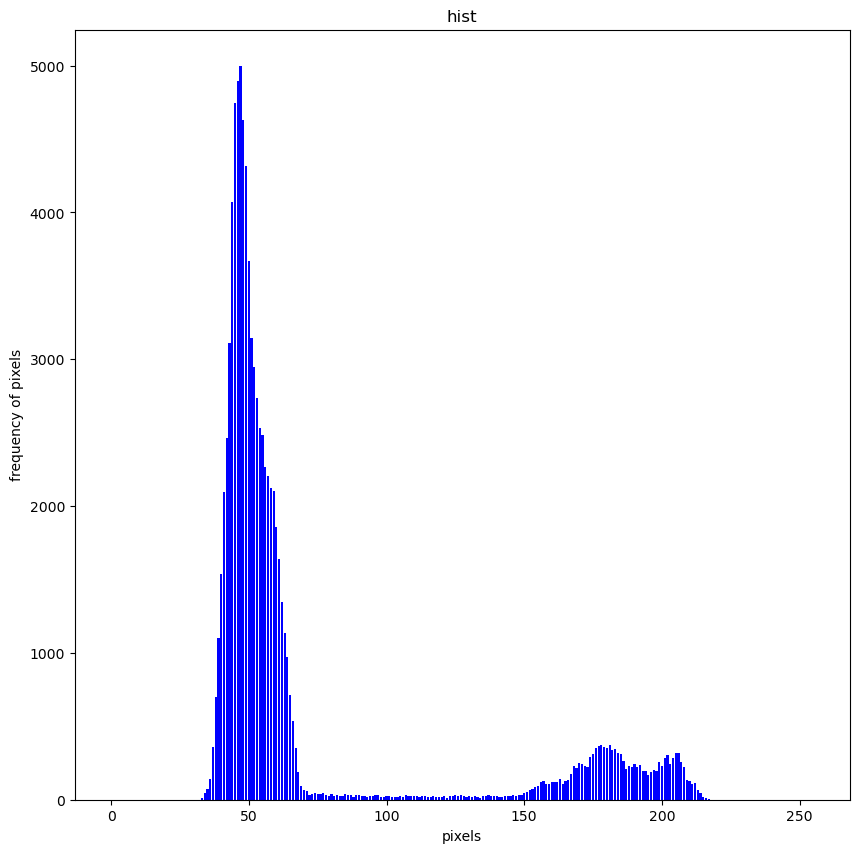

In [47]:
kernel = gaussian_filter(2.5)
print(gray(ima(imarray)))
gray_5 = grayim(ima(imarray))
flat_gray_5 = gray_5.flatten()
a,b = within_class_variance(flat_gray_5,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_5) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block

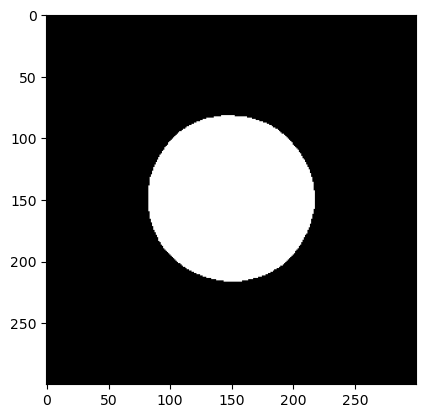

In [49]:
plt.imshow(otsu(gray_5,116), cmap = 'gray')

## sigma = 5

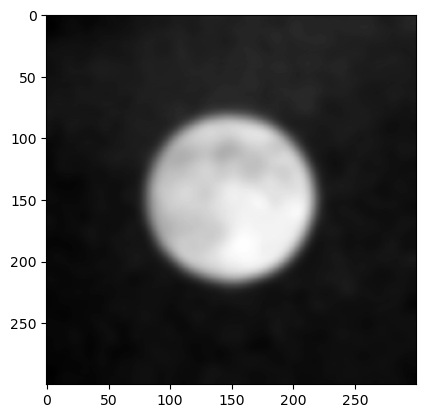

None
114 153.64105068928217


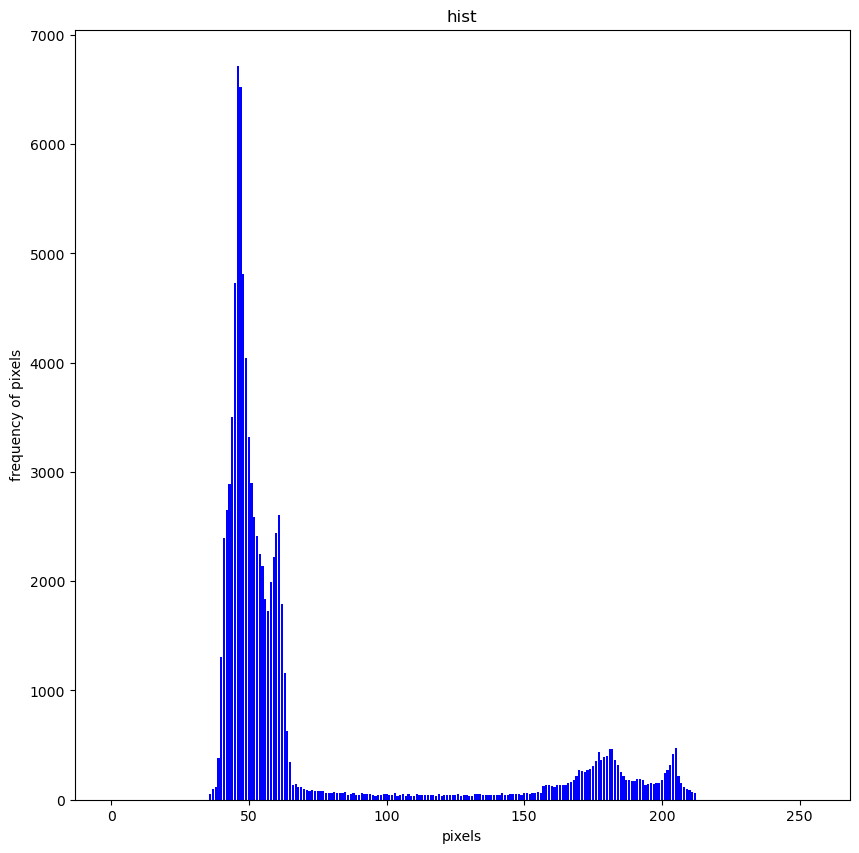

In [50]:
kernel = gaussian_filter(5)
print(gray(ima(imarray)))
gray_6 = grayim(ima(imarray))
flat_gray_6 = gray_6.flatten()
a,b = within_class_variance(flat_gray_6,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_6) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block

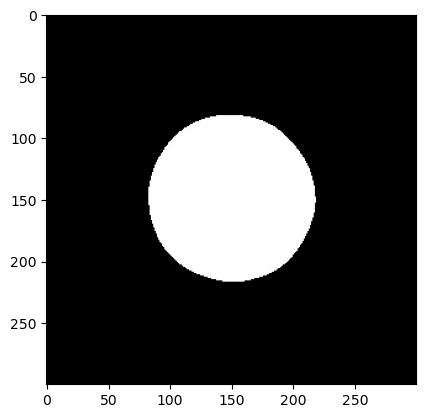

In [56]:
plt.imshow(otsu(gray_6,114), cmap = 'gray')

## sigma = 10

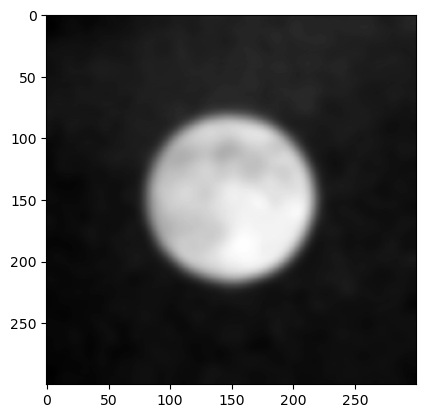

None
114 153.64105068928217


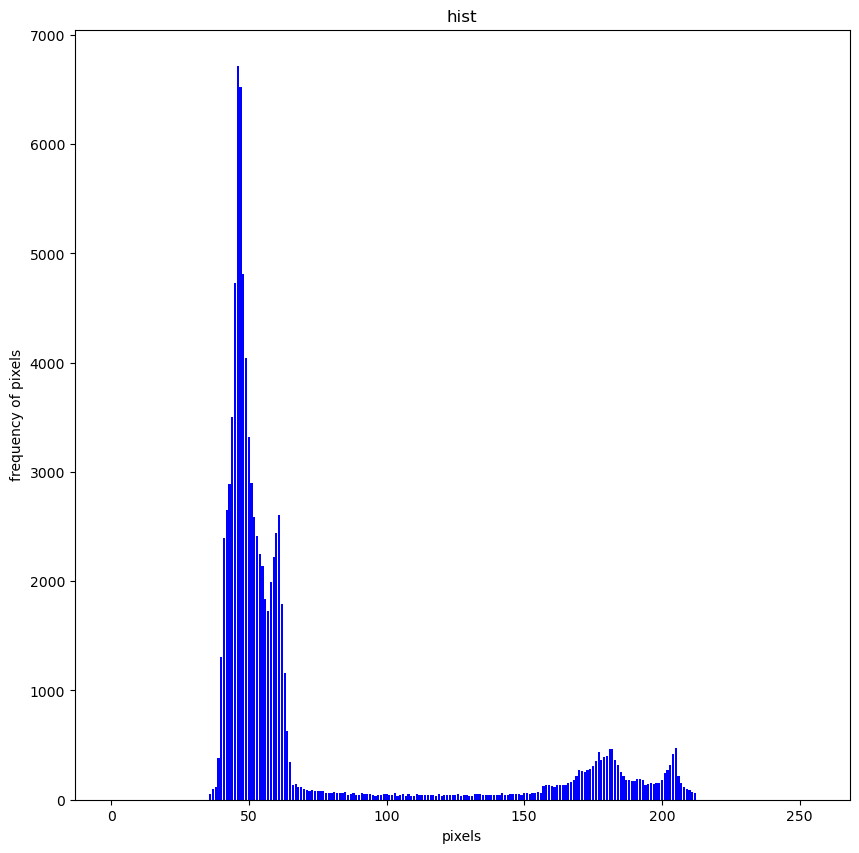

In [52]:
kernel = gaussian_filter(5)
print(gray(ima(imarray)))
gray_7 = grayim(ima(imarray))
flat_gray_7 = gray_7.flatten()
a,b = within_class_variance(flat_gray_7,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_7) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block

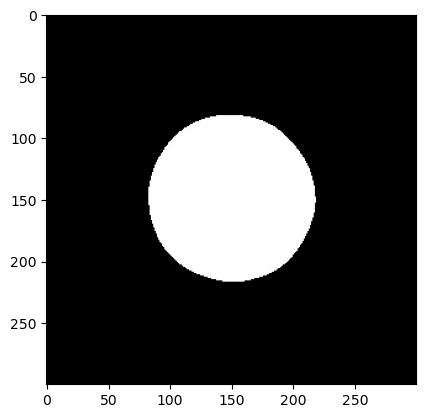

In [57]:
plt.imshow(otsu(gray_7,114), cmap = 'gray')

## sigma = 20

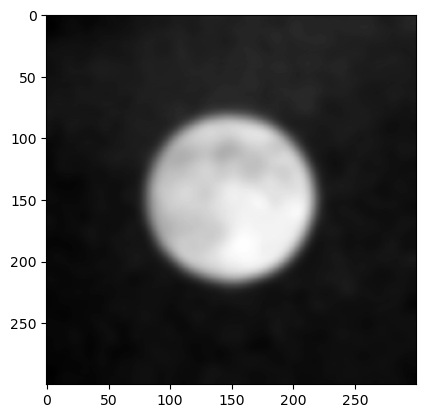

None
114 153.64105068928217


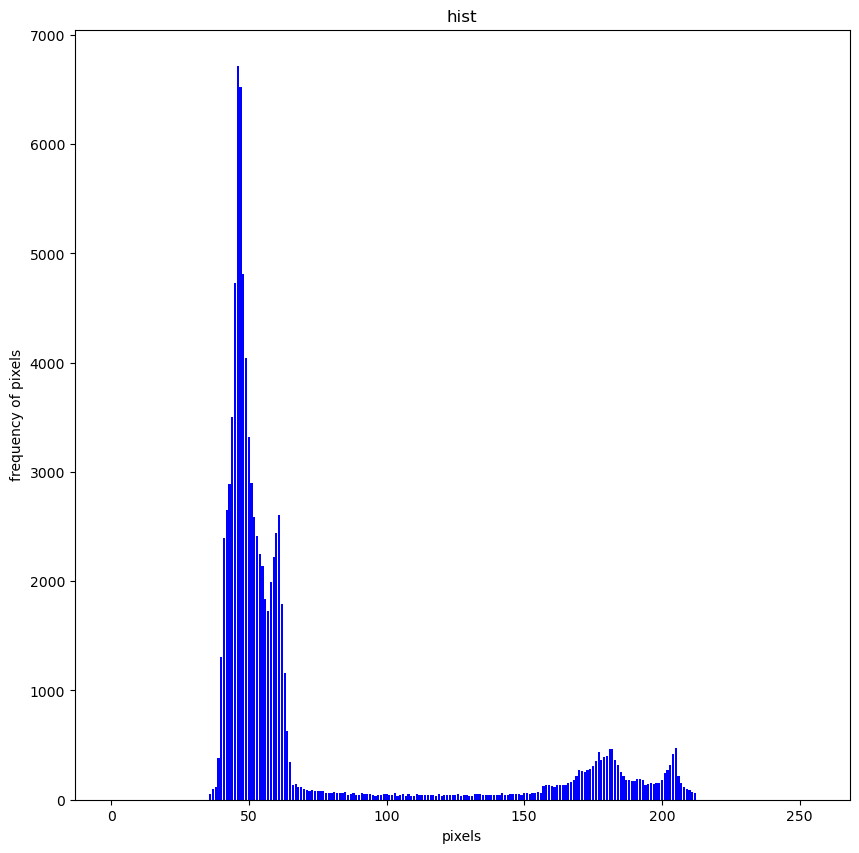

In [54]:
kernel = gaussian_filter(5)
print(gray(ima(imarray)))
gray_8 = grayim(ima(imarray))
flat_gray_8 = gray_7.flatten()
a,b = within_class_variance(flat_gray_8,255)
print(a,b)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("hist")
from matplotlib.pyplot import figure
plt.xlabel("pixels") 
plt.ylabel("frequency of pixels")
plt.bar(np.arange(256),histogram(flat_gray_8) , color = 'blue');





def otsu(block,thr):
    arr_block = np.zeros(block.shape)

    arr_block[block <= thr] = 0
    arr_block[block > thr] = 255
    return arr_block

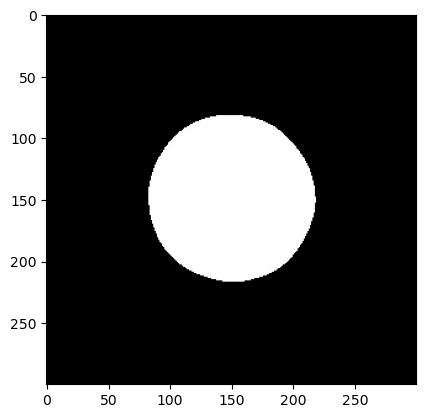

In [58]:
plt.imshow(otsu(gray_8,114), cmap = 'gray')

## comment:


#### As we are increasing the sigma_g value 

# Question 2 

downsampling by factor of 2

(113, 200)


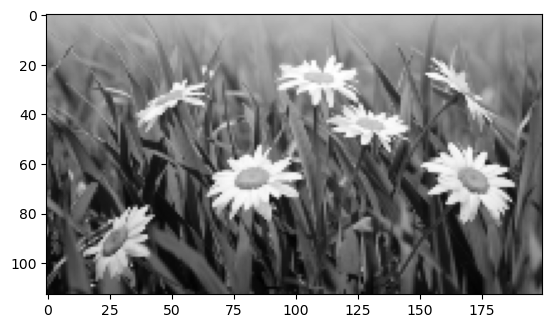

array([[179., 177., 175., ..., 174., 174., 173.],
       [177., 175., 172., ..., 171., 172., 171.],
       [176., 172., 170., ..., 169., 169., 169.],
       ...,
       [ 49.,  21.,  15., ...,  78.,  63.,  89.],
       [ 19.,  20.,  20., ...,  96.,  90., 106.],
       [ 19.,  19.,  21., ..., 110., 103., 117.]])

In [59]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
flowers = Image.open('flowers.png')
flowers_array = np.asarray(flowers)
downscaling_factor = 2
new_size = flowers_array.shape[0] // downscaling_factor, flowers_array.shape[1] // downscaling_factor
print(new_size)
flowers_downscaled = np.zeros(new_size)
def downscaling_flower(flowers_array, flowers_downscaled):
    h, w = flowers_array.shape[0], flowers_array.shape[1]
    for i in range(0, h - 1, 2):  
        for j in range(0, w - 1, 2):
            
            A = np.array([
                flowers_array[i, j],
                flowers_array[i, j + 1],
                flowers_array[i + 1, j],
                flowers_array[i + 1, j + 1]])
            new_i = i%2/2
            new_j = j%2/2
            new_value = (1-new_i)*(1-new_j)*A[0] + (1-new_i)*(new_j)*A[2] + (1-new_j)*(new_i)*A[1] + new_i * new_j* A[3] 
            new_i = (i + 1) // 2
            new_j = (j + 1) // 2
            flowers_downscaled[new_i, new_j] = new_value
    return flowers_downscaled
downscaled_image = downscaling_flower(flowers_array, flowers_downscaled)
plt.imshow(downscaled_image, cmap ='gray')
plt.show()
downscaled_image

upsampling the downsampled image by 3

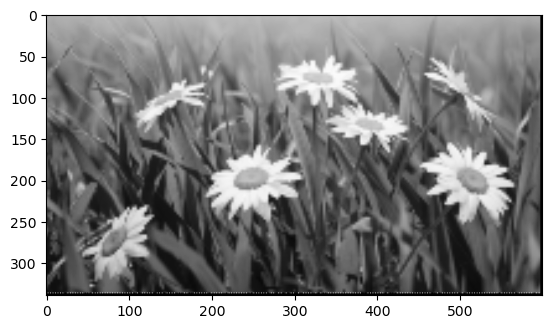

(339, 600)

In [60]:
upscaling_factor = 3
new_size = downscaled_image.shape[0] * upscaling_factor, downscaled_image.shape[1]* upscaling_factor

flowers_upscaled = np.zeros(new_size)
for i in range(0, 113):  
        for j in range(0, 200):
            flowers_upscaled[3*i][3*j] = flowers_downscaled[i][j]

flowers_upscaled

for i in range(0,336,3):
    for j in range(0,597,3):
        A = np.array([
                flowers_upscaled[i, j],
                flowers_upscaled[i, (j + 3)],
                flowers_upscaled[(i + 3), j],
                flowers_upscaled[(i + 3), (j + 3)]])
            
            
        B = np.array([[1, i, j, i*j],
                         [1, i, j+3, i*(j+3)],
                         [1, i+3, j, (i+3)*j],
                         [1, i+3, j+3, (i+3)*(j+3)]])
        #print(flowers_upscaled[0,0])
        #print(flowers_upscaled[0,3])
        
        a0, a1, a2, a3 = np.linalg.solve(B,A)
        #print(a0,a1,a2,a3)
        new_value1 = a0 + (i)*a1 + (j+1)*a2 + (i)*(j+1)*a3
        new_value2 = a0 + (i)*a1 + (j+2)*a2 + (j+2)*(i)*a3
        new_value3 = a0 + (i+1)*a1 + j*a2 + (i+1)*j*a3
        new_value4 = a0 + (i+1)*a1 + (j+1)*a2 + (i+1)*(j+1)*a3
        new_value5 = a0 + (i+1)*a1 + (j+2)*a2 + (j+2)*(i+1)*a3
        new_value6 = a0 + (i+1)*a1 + (j+3)*a2 + (j+3)*(i+1)*a3
        new_value7 = a0 + (i+2)*a1 + (j)*a2 + (i+2)*(j)*a3
        new_value8 = a0 + (i+2)*a1 + (j+1)*a2 + (j+1)*(i+2)*a3
        new_value9 = a0 + (i+2)*a1 + (j+2)*a2 + (i+2)*(j+2)*a3
        new_value10 = a0 + (i+2)*a1 + (j+3)*a2 + (i+2)*(j+3)*a3
        new_value11 = a0 + (i+3)*a1 + (j+1)*a2 + (i+3)*(j+1)*a3
        new_value12 = a0 + (i+3)*a1 + (j+2)*a2 + (i+3)*(j+2)
        
        
        
        
        
        
        
        
        flowers_upscaled[i,j+1] = new_value1
        flowers_upscaled[i,j+2] = new_value2
        flowers_upscaled[i+1,j] = new_value3
        flowers_upscaled[i+1,j+1] = new_value4
        flowers_upscaled[i+1,j+2] = new_value5
        flowers_upscaled[i+1,j+3] = new_value6
        flowers_upscaled[i+2,j] = new_value7
        flowers_upscaled[i+2,j+1] = new_value8
        flowers_upscaled[i+2,j+2] = new_value9
        flowers_upscaled[i+2,j+3] = new_value10
        flowers_upscaled[i+3, j+1] = new_value11
        flowers_upscaled[i+3, j+2] = new_value12
        
flowers_upscaled = np.clip(flowers_upscaled, 0, 255)

plt.imshow(flowers_upscaled, cmap = 'gray')
plt.show()
flowers_upscaled.shape

part b 

(340, 600)


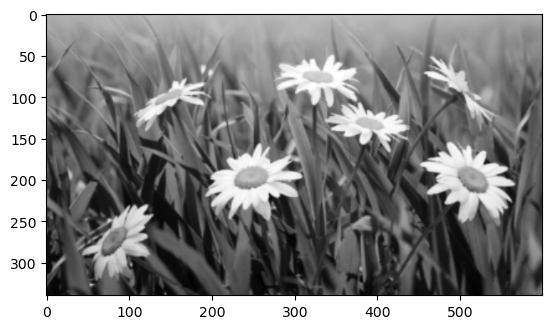

In [61]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


flowers = Image.open('flowers.png')
flowers_array = np.asarray(flowers)


upscaling_factor = 1.5


new_size = (int(flowers_array.shape[0] * upscaling_factor), 
            int(flowers_array.shape[1] * upscaling_factor))
print(new_size)


flowers_upscaled = np.zeros(new_size)


def upscaling_flower(flowers_array, flowers_upscaled, upscaling_factor):
    h, w = flowers_array.shape[0], flowers_array.shape[1]
    
    for i in range(new_size[0]):
        for j in range(new_size[1]):
            
            orig_i = i / upscaling_factor
            orig_j = j / upscaling_factor

            i0 = int(np.floor(orig_i))
            j0 = int(np.floor(orig_j))
            i1 = min(i0 + 1, h - 1)
            j1 = min(j0 + 1, w - 1)

            
            di = orig_i - i0
            dj = orig_j - j0

            
            A = flowers_array[i0, j0]
            B = flowers_array[i0, j1]
            C = flowers_array[i1, j0]
            D = flowers_array[i1, j1]

            
            new_value = (1 - di) * (1 - dj) * A + (1 - di) * dj * B + di * (1 - dj) * C + di * dj * D
            
            
            flowers_upscaled[i, j] = new_value
    
    return flowers_upscaled


upscaled_image = upscaling_flower(flowers_array, flowers_upscaled, upscaling_factor)


plt.imshow(upscaled_image.astype(np.uint8), cmap='gray')
plt.show()

# Question 3

In [64]:
from PIL import Image
q3flowers = Image.open("brightness_contrast.jpg")
q3flowers_array = np.asarray(q3flowers)

Brightness

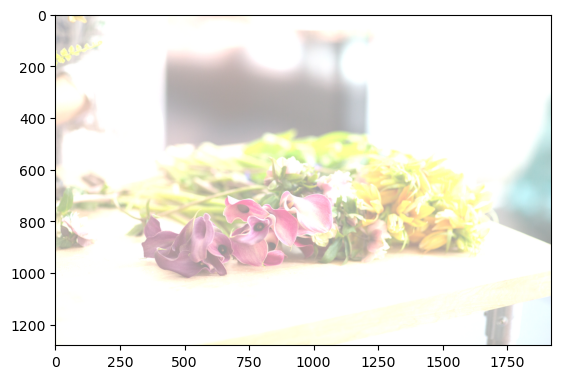

In [181]:
#brightness
from skimage import img_as_float
def brightness(imag,p):
    norm_img = img_as_float(imag)
    

    n = norm_img +(2*p-1)
    nn = np.clip(n,0,1)
    return plt.imshow(nn)
brightness(q3flowers_array,0.8)

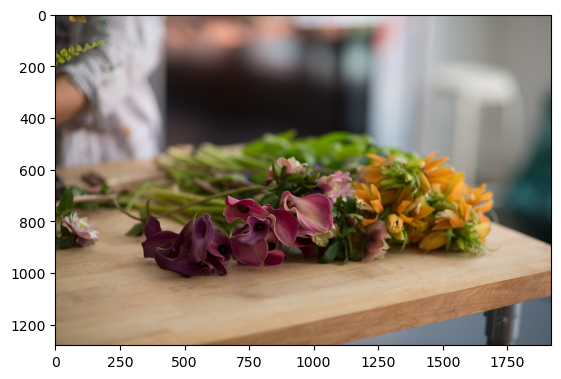

In [182]:
brightness(q3flowers_array,0.5)

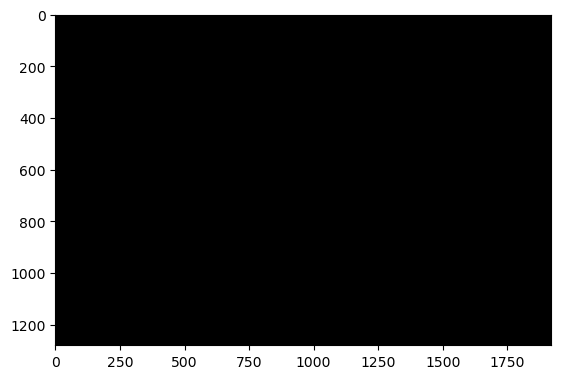

In [183]:
brightness(q3flowers_array,0)

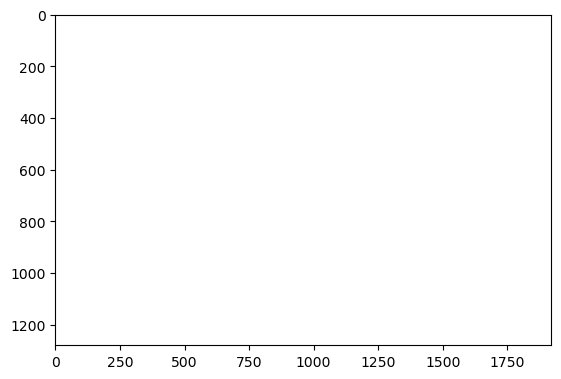

In [184]:
brightness(q3flowers_array,1)

Contrast

In [179]:
ps = q3flowers_array
b, g, r = cv2.split(q3flowers_array)
b_zero = np.zeros(b.shape)
g_zero = np.zeros(g.shape)
r_zero = np.zeros(r.shape)
image_zeros = cv2.merge([b_zero, g_zero, r_zero])
b_ones = np.ones(b.shape)
g_ones = np.ones(g.shape)
r_ones = np.ones(r.shape)
image_ones = cv2.merge([b_ones, g_ones, r_ones])

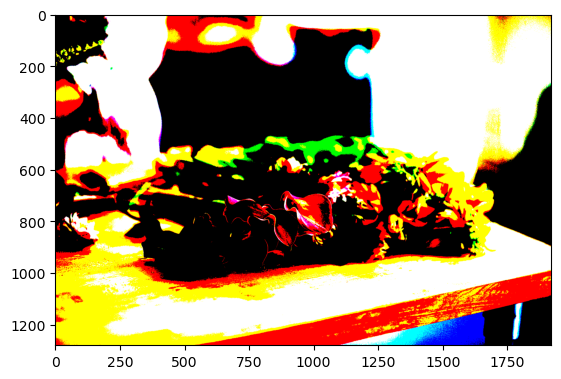

In [208]:
def contrast_adjust(image, p):
    img_normalized = img_as_float(image)

    if p == 0.5:
        #original image
        return image
    
    elif p == 0:
        #grey_image
        ps = image_ones * 0.5
    
    elif p == 1:
        ps = np.where(img_normalized > 0.5, 1, 0)
    
    else:
        
        ps = (1 / (1 - p)) * img_normalized + 0.5
        ps = np.clip(ps, 0, 1)
    ps = (ps * 255).astype(np.uint8)

    return ps
cont = contrast_adjust(q3flowers_array, 1)
plt.imshow(cont)

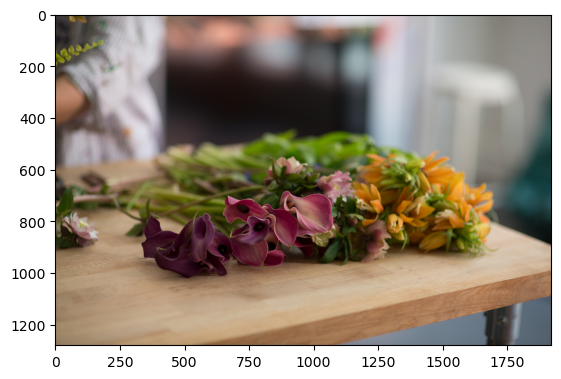

In [205]:
plt.imshow(contrast_adjust(q3flowers_array,0.5))

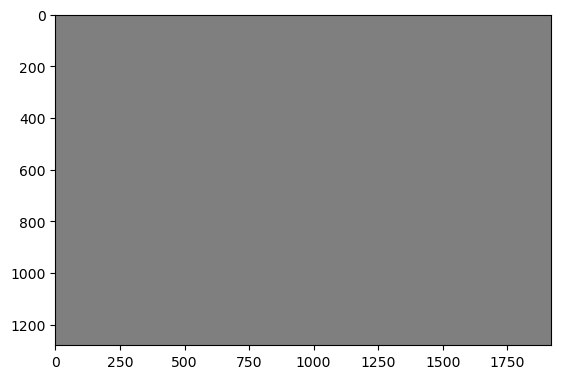

In [206]:
plt.imshow(contrast_adjust(q3flowers_array,0))

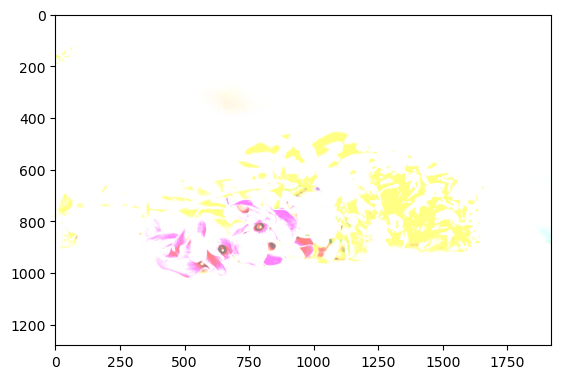

In [209]:
plt.imshow(contrast_adjust(q3flowers_array,0.9))